In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
import joblib
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df = pd.read_csv('selected_df.csv')

In [3]:
df.head()

,Merchant_category,Transaction_amount,Gender,zip,Job,trans_num,trans_hour,cust_age_groups,amount_to_avg_ratio,Is_fraud
0,misc_net,4.97,F,28654,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0,30-40,0.055587,0
1,grocery_pos,107.23,F,99160,Special educational needs teacher,1f76529f8574734946361c461b024d99,0,40-50,1.912154,0
2,entertainment,220.11,M,83252,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0,50-60,3.147834,0
3,gas_transport,45.00,M,59632,Patent attorney,6b849c168bdad6f867558c3793159a81,0,50-60,0.561868,0
4,misc_pos,41.96,M,24433,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0,30-40,0.440104,0


In [4]:
X = df.drop(columns=['Is_fraud'])  # Features
y = df['Is_fraud']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1296675, 9), (555719, 9), (1296675,), (555719,))

In [6]:
# storing the transaction numbers from both train and test data into separate dataframes respectively
txn_train = pd.DataFrame(X_train[['trans_num','Transaction_amount']].values, columns = ['txn_num','amt'])
txn_test = pd.DataFrame(X_test[['trans_num','Transaction_amount']].values, columns = ['txn_num','amt'])

# check
txn_train

,txn_num,amt
0,9006071a5e8236bb033f9b2ca5e90d87,62.29
1,ac2d8ed507b62698aa5c344f1c1f9c88,5.56
2,cd4a1a4fe9a5de2e49fd1f9ffdd7d956,9.9
3,2cb6aeed31669f676c1789e3d44f6553,6.29
4,12881b494567a8f8eaee4db02b73eedc,20.71
...,...,...
1296670,444d47d2786e8b0b345a486baa47f510,19.13
1296671,a041ad4ddb4532d9b6147b94259dd9ea,74.15
1296672,93c58684304726579f25df4d844e0c7c,116.07
1296673,8f00350564ae8d24c6a08d715325d0be,2.52


In [7]:
# check 2
txn_test

,txn_num,amt
0,4f766b89f4a048905868115a335fe7a0,112.65
1,79255478c6f35c281418bb41ecb08e66,5.11
2,01efa2e78fc95bba74bf38145bb1de86,7.74
3,0ed04256bc61306478786e4ea3170b4d,7.53
4,0e34606b61baef173b7eebdeaf038dcf,98.67
...,...,...
555714,95c1ccbeb146ad868f13ed30b384dfbc,3.55
555715,ddea0008dd1478215074cf351e3fabab,72.5
555716,cef6ed3fbdb0c7aac9f4e2f48fddc765,18.79
555717,fc31b7df41aa42f8f5ecefbafe3ba7f8,1.1


In [8]:
df.head()

,Merchant_category,Transaction_amount,Gender,zip,Job,trans_num,trans_hour,cust_age_groups,amount_to_avg_ratio,Is_fraud
0,misc_net,4.97,F,28654,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0,30-40,0.055587,0
1,grocery_pos,107.23,F,99160,Special educational needs teacher,1f76529f8574734946361c461b024d99,0,40-50,1.912154,0
2,entertainment,220.11,M,83252,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0,50-60,3.147834,0
3,gas_transport,45.00,M,59632,Patent attorney,6b849c168bdad6f867558c3793159a81,0,50-60,0.561868,0
4,misc_pos,41.96,M,24433,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0,30-40,0.440104,0


In [9]:
df.drop('trans_num',axis = 1, inplace = True)

In [10]:
#loading the label encoders
le_gender=joblib.load('encoders/le_gender.pkl')
le_merchant_category=joblib.load('encoders/le_merchant_category.pkl')
le_cust_age_groups=joblib.load('encoders/le_cust_age_groups.pkl')
le_Job=joblib.load('encoders/le_Job.pkl')

In [11]:
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Merchant_category'] = le_merchant_category.fit_transform(df['Merchant_category'])
df['Job'] = le_Job.fit_transform(df['Job'])
df['cust_age_groups'] = le_cust_age_groups.fit_transform(df['cust_age_groups'])

# Train-Test split

In [12]:
X = df.drop(columns=['Is_fraud'])  # Features
y = df['Is_fraud']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1296675, 8), (555719, 8), (1296675,), (555719,))

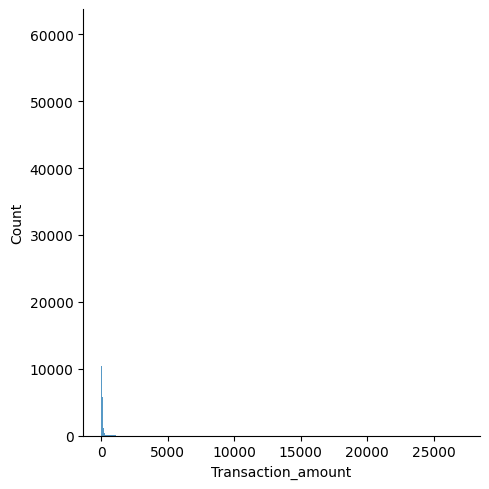

In [14]:
# let's see how the numerical columns are distributed
sns.displot(X_train['Transaction_amount'])

In [15]:
# applying log transformations
X_train['Transaction_amount'] = np.log(X_train['Transaction_amount']+1)
X_test['Transaction_amount'] = np.log(X_test['Transaction_amount']+1)

C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_12640\1944970355.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Transaction_amount'])
C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_12640\1944970355.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test['T

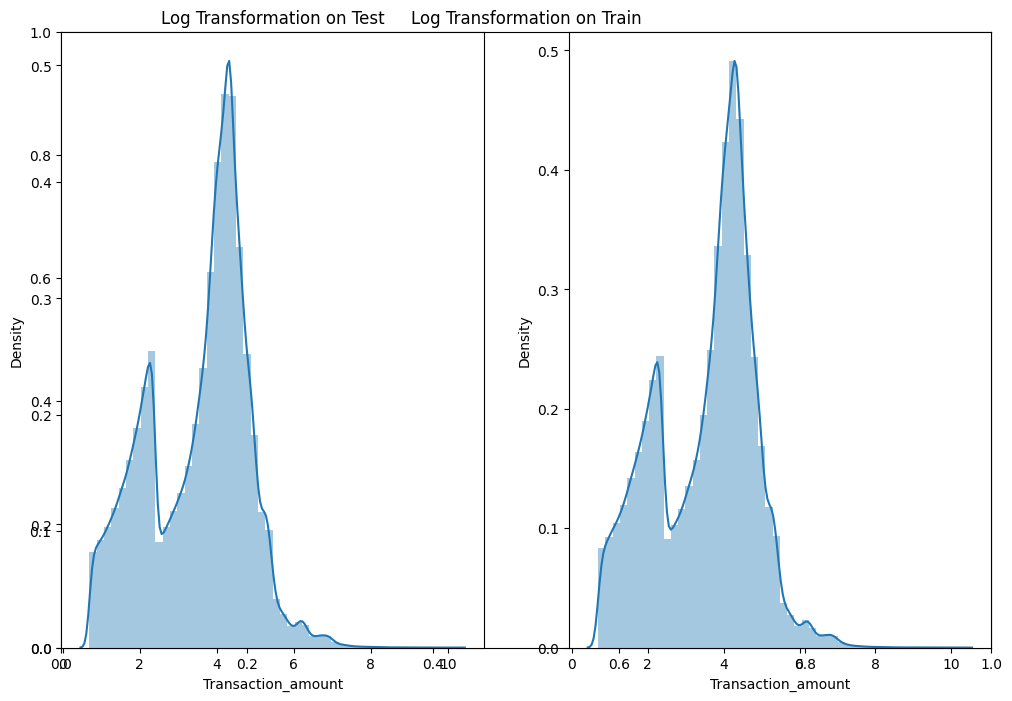

In [16]:
plt.figure(figsize=(12, 8))
plt.title('Log Transformation on Train')
plt.subplot(1, 2, 1)
sns.distplot(X_train['Transaction_amount'])

plt.title('Log Transformation on Test')
plt.subplot(1, 2, 2)
sns.distplot(X_test['Transaction_amount'])
plt.show()


In [17]:
df.head()

,Merchant_category,Transaction_amount,Gender,zip,Job,trans_hour,cust_age_groups,amount_to_avg_ratio,Is_fraud
0,8,4.97,0,28654,372,0,2,0.055587,0
1,4,107.23,0,99160,431,0,3,1.912154,0
2,0,220.11,1,83252,308,0,4,3.147834,0
3,2,45.00,1,59632,330,0,4,0.561868,0
4,9,41.96,1,24433,116,0,2,0.440104,0


# 4. Model selection and evaluation


In [18]:
#loading the scaler
from sklearn.preprocessing import StandardScaler
temp_scaler = StandardScaler()

In [19]:
X_train_scaled = temp_scaler.fit_transform(X_train)
X_test_scaled = temp_scaler.transform(X_test)

In [20]:
df['Is_fraud'].value_counts()

Is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [21]:
scale_pos_weight = 1842743 / 9651
print(round(scale_pos_weight))

191


In [22]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight ='balanced'),
    'XGBoost': xgb.XGBClassifier(scale_pos_weight='191'),
    'LightGBM': lgb.LGBMClassifier(is_unbalance=True)
}
results = {}

In [23]:
from tqdm import tqdm

In [24]:
ModelName=[]
ModelAccuracy=[]
for name, model in tqdm(models.items()):
    model.fit(X_train_scaled, y_train)
    ModelName.append(name)
    y_pred = model.predict(X_test_scaled)
    ModelAccuracy.append([
         accuracy_score(y_test, y_pred),
         precision_score(y_test, y_pred),
         recall_score(y_test, y_pred),
         f1_score(y_test,y_pred)
         ])
ModelAccuracy=pd.DataFrame(ModelAccuracy,index=ModelName,columns=['Accuracy','Precision','Recall','F1 Score'])
ModelAccuracy

 80%|████████  | 4/5 [06:19<01:43, 103.87s/it]

[LightGBM] [Info] Number of positive: 6756, number of negative: 1289919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005210 -> initscore=-5.251904
[LightGBM] [Info] Start training from score -5.251904


c:\Users\Youssef Abdel Khaleq\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
100%|██████████| 5/5 [06:22<00:00, 76.57s/it] 


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.921007,0.046116,0.719516,0.086676
Decision Tree,0.998103,0.835337,0.792055,0.813121
Random Forest,0.998647,0.957320,0.774784,0.856434
XGBoost,0.990706,0.354711,0.957168,0.517605
LightGBM,0.971038,0.146567,0.945423,0.253790


🌉 Why Choose Random Forest?
Highest Overall Accuracy (99.86%)
➤ This means the model rarely makes mistakes, and that’s critical for a fraud detection system.

Top Precision (95.73%)
➤ When the model flags a transaction as fraud, it's correct 95% of the time – reducing false alarms.

Strong Recall (77.47%)
➤ It still captures the majority of fraudulent cases. While not the highest (XGBoost does better here), RF offers a solid balance between precision and recall.

Best F1 Score (85.65%)
➤ F1 score is the most balanced metric, and Random Forest has the best score, showing it’s reliable and balanced.

# Random Forest Classifier

In [25]:
rf = RandomForestClassifier(class_weight = 'balanced')

In [26]:
# fitting on the training data
rf.fit(X_train_scaled,y_train)

# predictions on the training data
y_pred_train_rf = rf.predict(X_train_scaled)

# predictions on the test data
y_pred_test_rf = rf.predict(X_test_scaled)

In [27]:
# check confusion matrix on both train and test data

## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_pred_train_rf)
cm_test = confusion_matrix(y_test,y_pred_test_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)

Training data: [[1289918       1]
 [      2    6754]]

Testing data: [[552720    104]
 [   639   2256]]


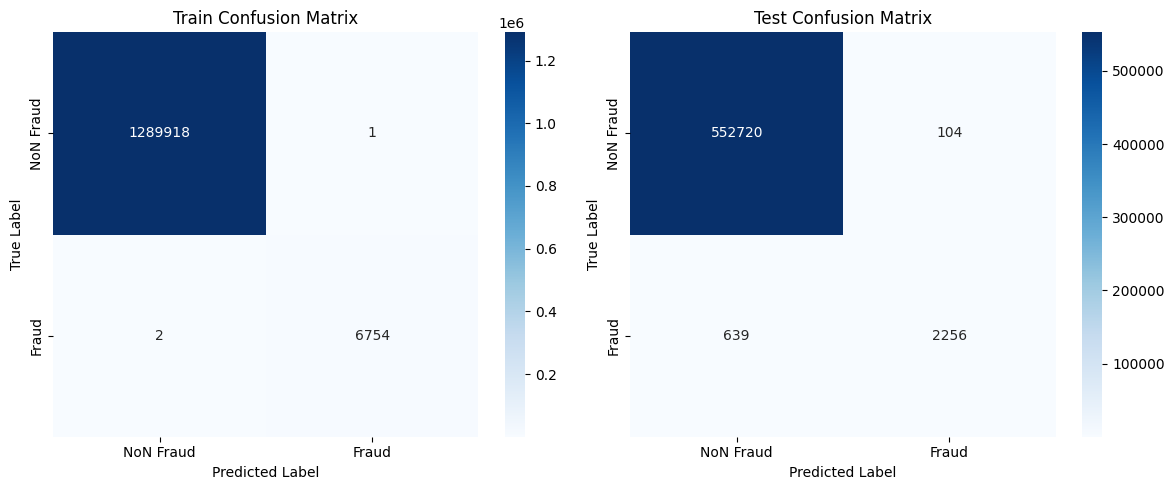

In [28]:

plt.figure(figsize=(12, 5))

# Confusion Matrix - Train
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=["NoN Fraud", "Fraud"],
            yticklabels=["NoN Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Train Confusion Matrix")

# Confusion Matrix - Test
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=["NoN Fraud", "Fraud"],
            yticklabels=["NoN Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

In [29]:

# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')

Recall score of the model on train data: 0.9997039668442865


In [30]:
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')

Recall score of the model on test data: 0.7792746113989637


In [31]:
# get the parameters of the model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
rf = RandomForestClassifier(class_weight = 'balanced')
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['gini','entropy','log_loss'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}
#randomized search cv
rcv = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 10, scoring = 'recall', cv = 10, verbose=5,
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=5)

In [33]:
# best estimator
rcv.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, min_samples_leaf=6, n_estimators=40,
                       oob_score=True)

In [35]:
# best score
rcv.best_score_

np.float64(0.9473079114617574)

In [36]:
# let's re build random forest model
rf = rcv.best_estimator_

# fitting on train data
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, min_samples_leaf=6, n_estimators=40,
                       oob_score=True)

In [37]:
# predictions on train data
y_train_pred_rf = rf.predict(X_train)

# predictions on test data
y_test_pred_rf = rf.predict(X_test)

In [38]:
# check confusion matrix on both train and test data
## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_train_pred_rf)
cm_test = confusion_matrix(y_test,y_test_pred_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)

Training data: [[1271591   18328]
 [    209    6547]]

Testing data: [[544734   8090]
 [   147   2748]]


In [39]:
# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')

Recall score of the model on train data: 0.9690645352279456
Recall score of the model on test data: 0.9492227979274611


In [40]:
feature_names = X.columns
feature_imp_rf = pd.DataFrame({
    'feature': feature_names,
    'feature_importance_%': rf.feature_importances_ * 100
})


In [41]:
# check
feature_imp_rf = feature_imp_rf.sort_values(by='feature_importance_%', ascending=False).reset_index(drop=True)
feature_imp_rf

,feature,feature_importance_%
0,Transaction_amount,42.846809
1,amount_to_avg_ratio,26.966129
2,trans_hour,15.346111
3,Merchant_category,11.808152
4,cust_age_groups,1.304563
5,zip,0.702975
6,Job,0.631541
7,Gender,0.393720


Inferences: As per the random forest model, the top 3 significant features are Transaction_amount, Transaction_hour and Merchant category.

In [42]:
selected_features = ['Transaction_amount', 'trans_hour', 'Merchant_category']


In [43]:
X = df[selected_features]  # Features
y = df['Is_fraud']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [44]:
final_scaler = StandardScaler()

In [45]:
X_train_scaled = final_scaler.fit_transform(X_train)
X_test_scaled = final_scaler.transform(X_test)

In [46]:
import joblib
joblib.dump(final_scaler, 'scaler/final_scaler.pkl')

['scaler/final_scaler.pkl']

In [48]:
# initializing random forest model
rf = rcv.best_estimator_

# fitting
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, min_samples_leaf=6, n_estimators=40,
                       oob_score=True)

In [49]:
# predictions on train data
y_train_pred_rf = rf.predict(X_train_scaled)

# predictions on test data
y_test_pred_rf = rf.predict(X_test_scaled)

In [50]:
# check confusion matrix on both train and test data
## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_train_pred_rf)
cm_test = confusion_matrix(y_test,y_test_pred_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)

Training data: [[1270095   19824]
 [    197    6559]]

Testing data: [[544157   8667]
 [   142   2753]]


In [51]:
# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')

Recall score of the model on train data: 0.9708407341622262
Recall score of the model on test data: 0.9509499136442142


In [52]:
# feature importances
feature_imp_rf = pd.DataFrame(index = X_train_final.columns, data = rf.feature_importances_*100, columns = ['feature_importance_%'])

# check
feature_imp_rf

,feature_importance_%
Transaction_amount,66.624037
trans_hour,20.510392
Merchant_category,12.865571


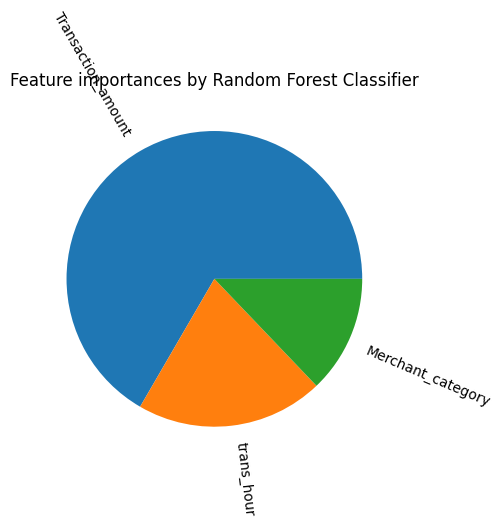

In [54]:
plt.title('Feature importances by Random Forest Classifier')
plt.pie(x = feature_imp_rf['feature_importance_%'], labels = feature_imp_rf.index, rotatelabels = True)
plt.show()

In [55]:
# creating a dataframe
rf_results = pd.DataFrame()

In [56]:
rf_results['txn_num'] = pd.concat([txn_train,txn_test])['txn_num'].values
rf_results['amt'] = pd.concat([txn_train,txn_test])['amt'].values
rf_results['fraud_act'] = np.concatenate([y_train,y_test],axis = 0)
rf_results['fraud_pred'] = np.concatenate([y_train_pred_rf,y_test_pred_rf],axis = 0)

# check
rf_results

,txn_num,amt,fraud_act,fraud_pred
0,9006071a5e8236bb033f9b2ca5e90d87,62.29,0,0
1,ac2d8ed507b62698aa5c344f1c1f9c88,5.56,0,0
2,cd4a1a4fe9a5de2e49fd1f9ffdd7d956,9.9,0,0
3,2cb6aeed31669f676c1789e3d44f6553,6.29,0,0
4,12881b494567a8f8eaee4db02b73eedc,20.71,0,0
...,...,...,...,...
1852389,95c1ccbeb146ad868f13ed30b384dfbc,3.55,0,0
1852390,ddea0008dd1478215074cf351e3fabab,72.5,0,0
1852391,cef6ed3fbdb0c7aac9f4e2f48fddc765,18.79,0,0
1852392,fc31b7df41aa42f8f5ecefbafe3ba7f8,1.1,0,0


Average number of transactions per month detected as fraudulent by the model (TF)

In [57]:
f_txns = round(len(rf_results[rf_results['fraud_pred'] == 1]['txn_num'].unique())/24)

print(f_txns)

1575


In [58]:
print(f'Total cost of providing customer support per month for fraudulent transactions detected by the model = {f_txns*1.5}')

Total cost of providing customer support per month for fraudulent transactions detected by the model = 2362.5


In [59]:
f_txns_tn = round(len(rf_results[(rf_results['fraud_act'] == 1) & (rf_results['fraud_pred'] == 0)]['txn_num'].unique())/24)

print(f_txns_tn)

14


In [60]:
print(f'Cost incurred due to fraudulent transactions left undetected by the model = {f_txns_tn*530.66}')

Cost incurred due to fraudulent transactions left undetected by the model = 7429.24


In [61]:
print(f'Cost incurred per month after the model is built and deployed = {2362.5+7429.24}')

Cost incurred per month after the model is built and deployed = 9791.74


# Final savings = Cost incurred before - Cost incurred after


In [62]:
print(f'Final savings = $ {213325.32 - 9791.74}')

Final savings = $ 203533.58000000002


Our Random forest classifier model saved almost 96% of the cost per month to the bank, it performed far better than the Logistic regression model.


In [63]:
# saving the Randomforest model as well
joblib.dump(rf, filename = r'models\randomforest_model_f.pkl')

['models\\randomforest_model_f.pkl']

In [65]:
X_train.columns

Index(['Transaction_amount', 'trans_hour', 'Merchant_category'], dtype='object')